# **PERKENALAN**

## 1. Latar Belakang
Project 1 mengangkat kasus regresi dengan dataset taxi online, pada project ini penulis ingin melihat hubungan dari nilai harga layanan taxi online dengan variabel-variabel yang disediakan (seperti provider taxi online, temperature hari pemesanan, tanggal pemesanan, dll) 

-----------------------------------------------------------------------

## 2. Dataset
### 2.1 Penjelasan dan Sumber
Dataset yang digunakan bersumber dari situs kaggle, Data tersebut merupakan data pemesanan taxi online dari dua provider taxi online terbesar, yaitu uber dan lyft, dataset terdiri dari 693071 data yang terbagi ke 57 kolom.

### 2.2 Penjelasan kelas dan kolom
Kolom-kolom tersebut nantinya akan dijadikan variabel independen dan variabel dependen, dimana nantinya variabel dependen (yaitu kolom harga) akan bergantung nilainya terhadap variabel independen (yaitu kolom numerik selain kolom harga)

-----------------------------------------------------------------------

## 3. Objective
Tujuan dari project ini adalah melihat variabel atau kolom apa yang mempunyai keterikatan kuat terhadap harga layanan dari taxi online


===================================================================================================================

# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics as skmet

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

===================================================================================================================

# **DATA LOADING**

In [2]:
df = pd.read_csv('./datasets/rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


#### Jumlah Data

In [3]:
print("Jumlah Data : ", len(df))

Jumlah Data :  693071


#### Deskripsi Dataset

In [4]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [5]:
df.price.unique()

array([ 5.  , 11.  ,  7.  , 26.  ,  9.  , 16.5 , 10.5 ,  3.  , 27.5 ,
       13.5 , 12.  , 16.  ,  7.5 ,  5.5 ,   nan,  3.5 ,  8.5 , 15.  ,
       20.5 , 19.5 , 29.5 ,  9.5 , 22.  , 13.  , 17.  , 10.  , 34.  ,
       18.5 , 36.  , 22.5 , 32.5 , 25.  , 27.  , 35.  ,  8.  , 23.5 ,
       14.  , 26.5 , 38.5 , 23.  , 30.5 , 17.5 , 30.  , 36.5 , 12.5 ,
       33.5 , 21.5 , 38.  , 18.  , 33.  , 32.  ,  6.5 , 11.5 , 31.5 ,
       28.5 , 24.  , 29.  , 31.  , 42.5 , 41.  , 19.  , 52.5 , 67.5 ,
       15.5 , 21.  , 45.5 , 28.  , 37.5 , 14.5 , 47.5 ,  4.5 , 40.5 ,
       55.  , 42.  , 46.5 , 50.5 , 24.5 , 41.5 , 56.  , 25.5 , 39.  ,
       57.5 , 20.  , 39.5 ,  6.  , 35.5 , 48.5 , 37.  , 45.  , 44.  ,
       34.5 ,  2.5 , 46.  , 48.  , 47.  , 54.  , 52.  , 62.  , 43.  ,
       43.5 , 80.  , 65.  , 51.5 , 40.  , 49.5 , 58.  , 75.  , 62.5 ,
       92.  , 87.  , 64.5 , 87.5 , 73.5 , 44.5 , 80.5 , 89.  , 53.  ,
       81.5 , 60.5 , 49.  , 53.5 , 51.  , 55.5 , 37.85, 59.  , 18.35,
       54.5 , 76.  ,

#### Kolom dataset

In [6]:
print(df.columns)

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

#### Tipe Data Tiap Kolom

In [7]:
display(df.dtypes)

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

===================================================================================================================

# **DATA CLEANING**

#### Handling Missing Value

In [8]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Penjelasan : Kolom price yang nantinya akan dijadikan variabel dependen mempunyai missing value sebanyak 55095 data

Solusi : Data missing value tersebut akan didrop, solusi ini dipilih karena data yang missing tersebut jumlahnya tidak terlalu banyak dibandingkan jumlah total data yaitu 693071 banding 55095 data

---

#### Penghapusan data missing value

In [9]:
df_withna = df[df['price'].isnull()]
df.dropna(axis=0, inplace=True)
df['price'].isnull().sum()

0

Menyiapkan data yang ingin dibuat model inference

In [10]:
df_withna.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600


In [11]:
print("Jumlah data sekarang : ", len(df))

Jumlah data sekarang :  637976


Seperti yang bisa dilihat jumlah nilai missing value pada kolom price telah habis

Dan jumlah data setelah dilakukan handling missing value berubah dari  693071 data menjadi 637976 data, tidak terlalu banyak data yang terbuang

---

#### Pengecekan kolom dengan nilai kategorikal dan numerik

In [12]:
display(df.dtypes)

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [13]:
df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

Kolom yang ,mempunyai tipe data object atau string akan didrop, kecuali kolom "cab_type", karena hanya memiliki 2 nilai yang nantinya bisa diubah kedalam bentuk numerik

---

#### Pengubahan nilai kolom "cab_type" menjadi nilai numerik

In [14]:
le = LabelEncoder()

In [15]:
df['cab_type'] = le.fit_transform(df.cab_type)

In [16]:
df['cab_type']

0         0
1         0
2         0
3         0
4         0
         ..
693065    1
693066    1
693067    1
693069    1
693070    1
Name: cab_type, Length: 637976, dtype: int32

---

#### Penghapusan Kolom yang tidak dipakai

In [17]:
display(df.dtypes)

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                         int32
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [18]:
df = df.drop(['id','timestamp' ,'datetime', 'timezone', 'source', 'destination', 'product_id', 'name', 'short_summary', 'long_summary', 'icon'], axis=1)

In [19]:
df

,hour,day,month,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,0,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,0,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,0,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,0,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,0,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,1,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,23,1,12,1,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,23,1,12,1,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,23,1,12,1,27.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [20]:
df.surge_multiplier.unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

---

# Data Eksplorasi dan Data Preprocessing

Karena kolomnya sangat banyak, jadinya perlu diambil kolom mana yang paling berpengaruh terhadap price. Untuk itu, dilakukanlah pencarian korelasi.

In [21]:
dfcorr = df.corr()
dfcorr

,hour,day,month,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
hour,1.000000,0.066223,-0.079734,-0.001442,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,0.066223,1.000000,-0.861325,0.002338,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,-0.079734,-0.861325,1.000000,-0.001100,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
cab_type,-0.001442,0.002338,-0.001100,1.000000,-0.083385,0.001941,-0.163745,-0.004227,0.002077,-0.002004,-0.003203,0.001602,0.002572,0.002237,0.003427,0.002850,0.000820,-0.001741,-0.003429,0.000854,-0.004242,0.000920,-0.003866,0.000847,-0.004123,0.000905,-0.000285,-0.000669,-0.000781,0.000663,-0.000574,-0.001741,0.000488,0.000867,0.000868,-0.001567,-0.000354,0.000875,-0.001588,0.000920,-0.003311,0.000834,-0.002656,0.000865,-0.003812,0.000822
price,0.000561,-0.000722,0.000913,-0.083385,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.002283,-0.000992,0.002402,0.001941,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,-0.000067,0.001397,-0.000612,-0.163745,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.019228,0.006744,0.085946,-0.004227,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,

Berikutnya melihat korelasi dengan heatmap

<AxesSubplot:>

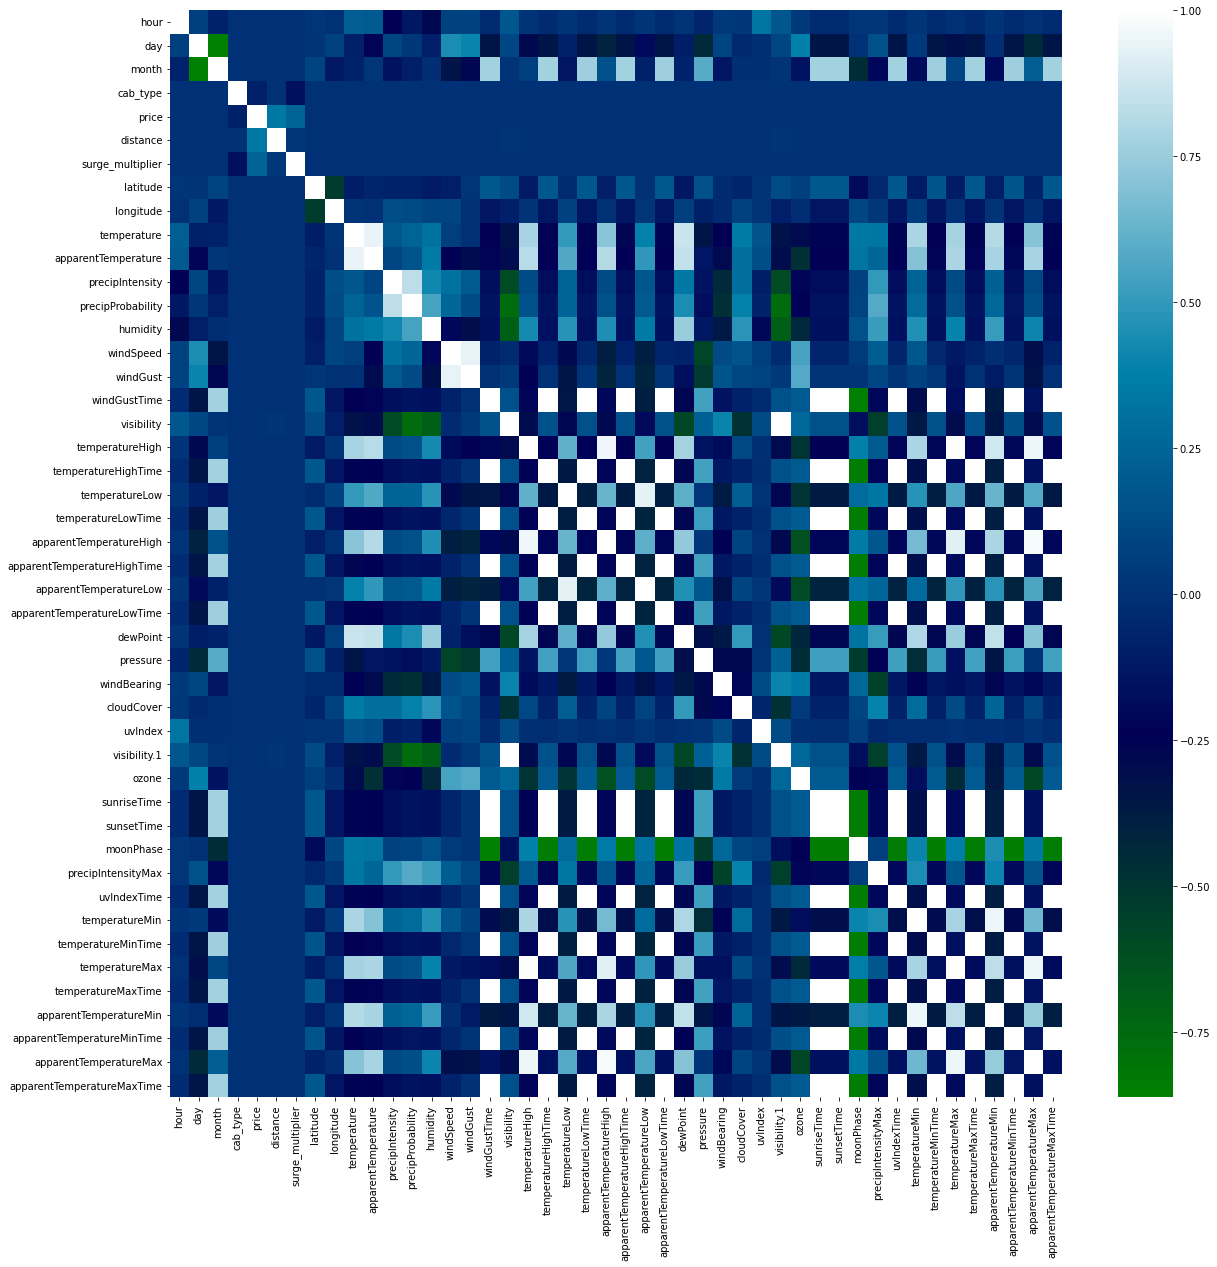

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(dfcorr, cmap='ocean')

Tahap berikutnya menyeleksi kolom mana yang ingin dipakai dengan acuan nilai korelasinya di atas 0,005 dan di bawah -0,005 terhadap price. Alasannya adalah semakin angka tersebut mendekati 0 maka pengaruhnya makin kecil dan price-lah yang ingin dijadikan sebagai hasil forecasting untuk regresi linear

In [23]:
dfcorr2 = dfcorr[(dfcorr['price'] >= 0.001) | (dfcorr['price'] <= -0.001)]
dfcorr2['price']

cab_type             -0.083385
price                 1.000000
distance              0.345061
surge_multiplier      0.240458
latitude              0.002088
longitude            -0.001417
humidity             -0.001238
windGust              0.001218
visibility            0.001497
windBearing          -0.001382
visibility.1          0.001497
moonPhase            -0.001602
precipIntensityMax    0.001114
Name: price, dtype: float64

In [24]:
dfcorr3 = dfcorr[(dfcorr['surge_multiplier'] >= 0.001) | (dfcorr['surge_multiplier'] <= -0.001)]
dfcorr3['surge_multiplier']

day                        0.001397
cab_type                  -0.163745
price                      0.240458
distance                   0.025946
surge_multiplier           1.000000
latitude                   0.001471
longitude                 -0.001961
temperature               -0.001594
apparentTemperature       -0.002586
precipIntensity           -0.001522
precipProbability         -0.002825
humidity                  -0.001677
windSpeed                  0.002593
windGust                   0.002162
visibility                 0.001716
temperatureHigh           -0.001943
temperatureLow            -0.002669
apparentTemperatureHigh   -0.002098
apparentTemperatureLow    -0.003088
dewPoint                  -0.001860
pressure                  -0.003109
windBearing                0.002171
cloudCover                -0.002101
uvIndex                   -0.002567
visibility.1               0.001716
ozone                      0.003456
temperatureMax            -0.001998
apparentTemperatureMin    -0

Setelah melakukan penyaringan dengan patokan korelasi, maka kita akan mengambil 8 kolom yaitu distance,surge_multiplier, price, cab_type, windgust, windbearing, visibility, dan moonphase. Sebelumnya, mentor menyarankan untuk mengambil hour dan day sebagai patokan juga. Akan tetapi, korelasinya sedikit sehingga tidak mengambil hour dan day.

In [25]:
true_df = df[['distance', 'surge_multiplier', 'price', 'cab_type', 'visibility', 'windBearing', 'moonPhase', 'windGust']]
true_df.head(3)

,distance,surge_multiplier,price,cab_type,visibility,windBearing,moonPhase,windGust
0,0.44,1.0,5.0,0,10.000,57,0.30,9.17
1,0.44,1.0,11.0,0,4.786,90,0.64,11.98
2,0.44,1.0,7.0,0,10.000,240,0.68,7.33


<AxesSubplot:title={'center':'Korelasi Heatmap dari Dataframe baru'}>

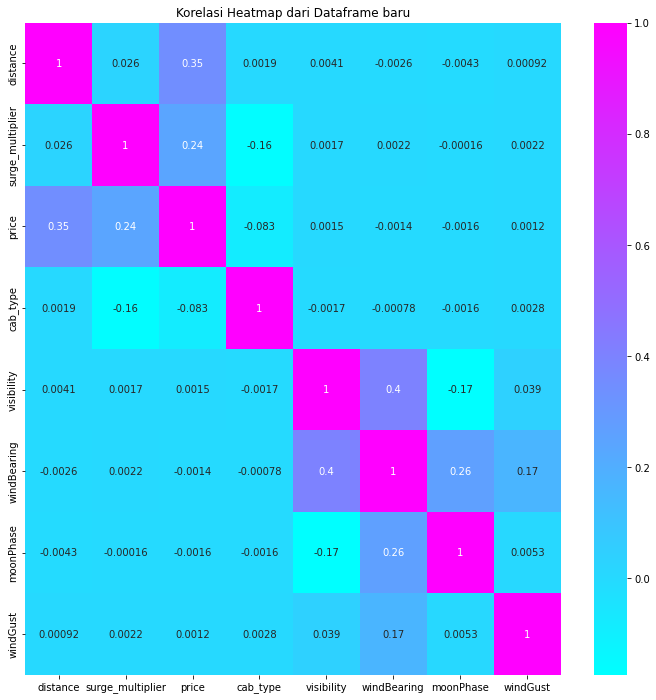

In [26]:
plt.figure(figsize=(12, 12))
plt.title('Korelasi Heatmap dari Dataframe baru')
sns.heatmap(true_df.corr(), annot=True, cmap='cool')

Berikutnya adalah membagi data tersebut menjadi X dan y. X akan dipilih kolom distance, surge_multiplier, cab_type, windgust, windbearing, visibility, dan moonphase,  sedangkan y adalah price.

In [27]:
X = true_df.drop(columns=['price'])
y = true_df['price']
display(X.head(3))
display(y.head(3))

,distance,surge_multiplier,cab_type,visibility,windBearing,moonPhase,windGust
0,0.44,1.0,0,10.000,57,0.30,9.17
1,0.44,1.0,0,4.786,90,0.64,11.98
2,0.44,1.0,0,10.000,240,0.68,7.33


0     5.0
1    11.0
2     7.0
Name: price, dtype: float64

In [28]:
def histo(newdf, judul, labelx, labely='Banyaknya Index'):
    newdf.hist(grid=False, figsize=(15,7), facecolor='crimson')
    plt.title(judul)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()

Menampilkan grafik histogram pada distance

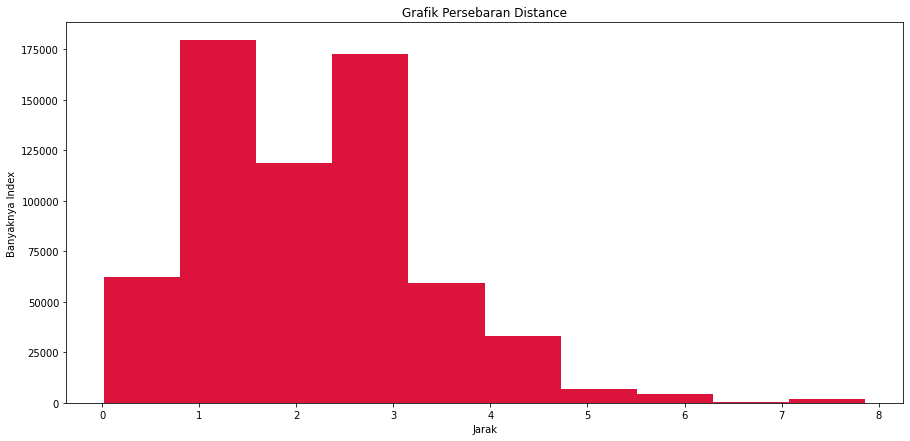

In [29]:
histo(df['distance'], judul="Grafik Persebaran Distance" , labelx='Jarak')

Menampilkan grafik histogram pada Surge Multiplier

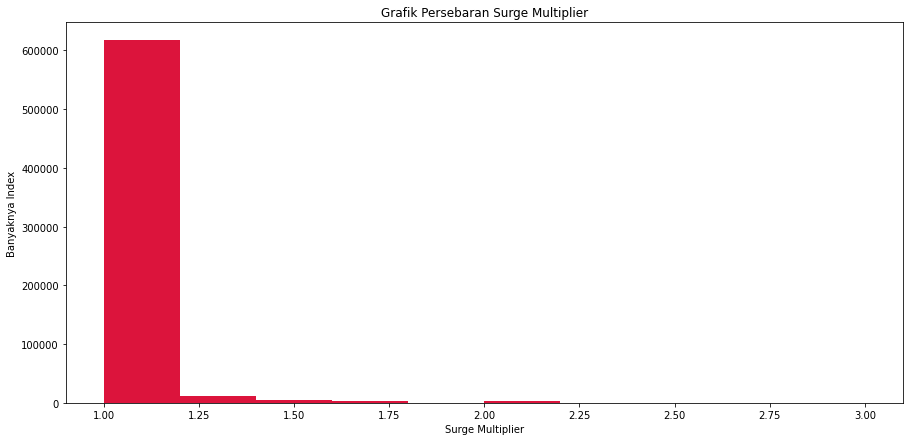

In [30]:
histo(df['surge_multiplier'], judul="Grafik Persebaran Surge Multiplier" , labelx='Surge Multiplier')

Menampilkan grafik histogram pada Cab Type

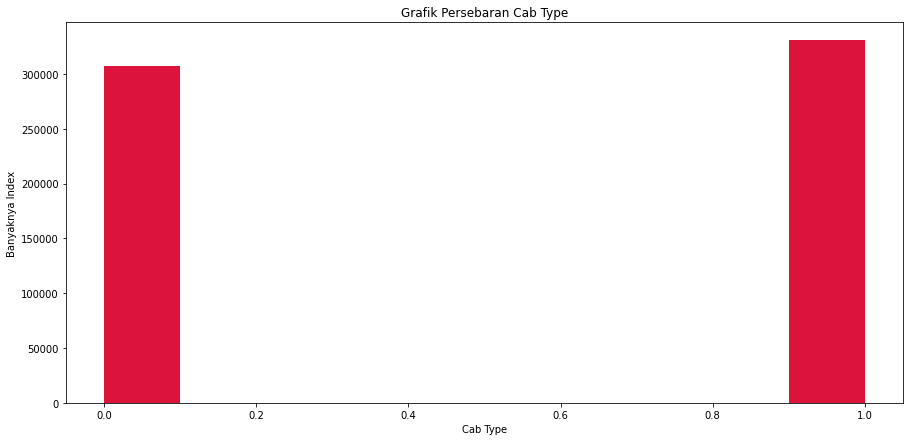

In [31]:
histo(df['cab_type'], judul="Grafik Persebaran Cab Type" , labelx='Cab Type')

Menampilkan grafik histogram pada Price

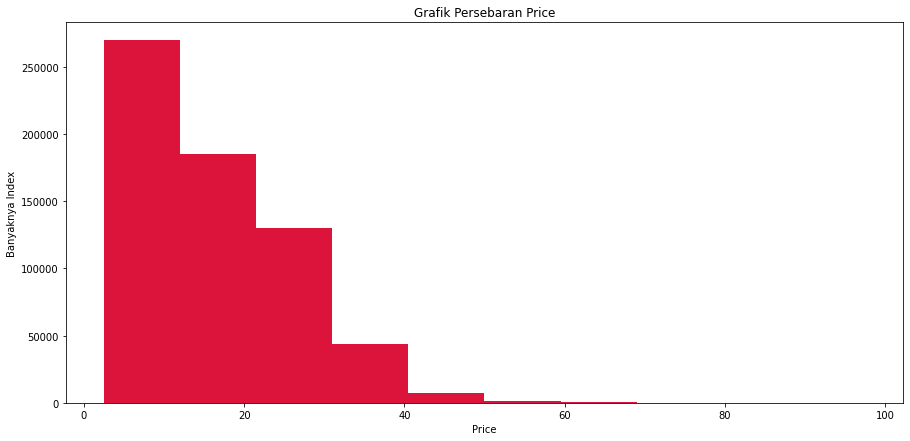

In [32]:
histo(df['price'], judul="Grafik Persebaran Price" , labelx='Price')

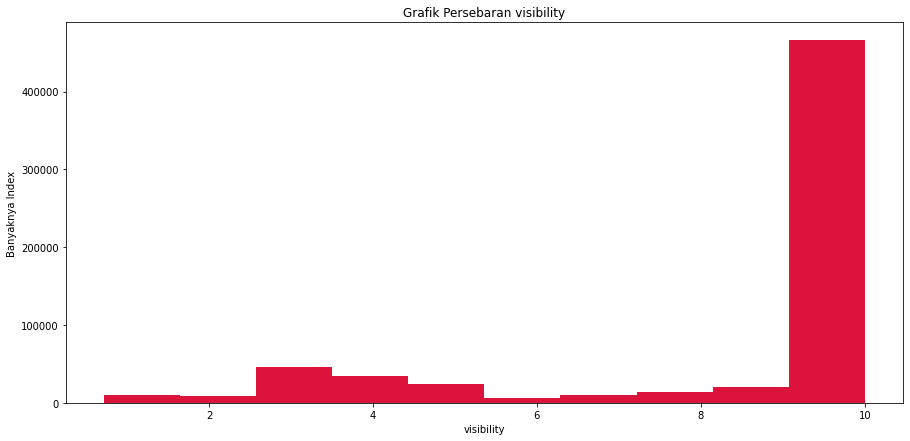

In [33]:
histo(df['visibility'], judul="Grafik Persebaran visibility" , labelx='visibility')

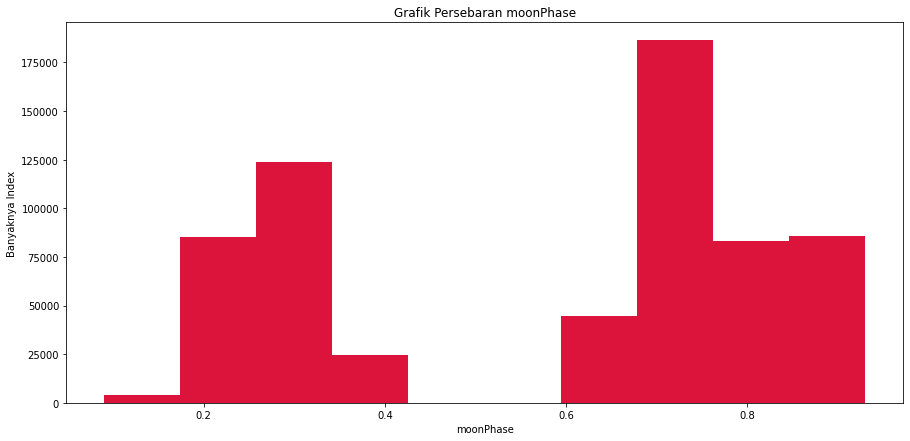

In [34]:
histo(df['moonPhase'], judul="Grafik Persebaran moonPhase" , labelx='moonPhase')

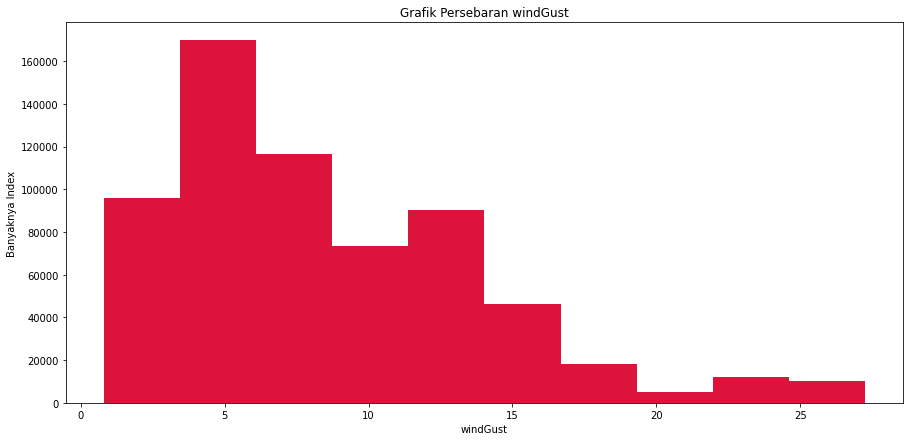

In [35]:
histo(df['windGust'], judul="Grafik Persebaran windGust" , labelx='windGust')

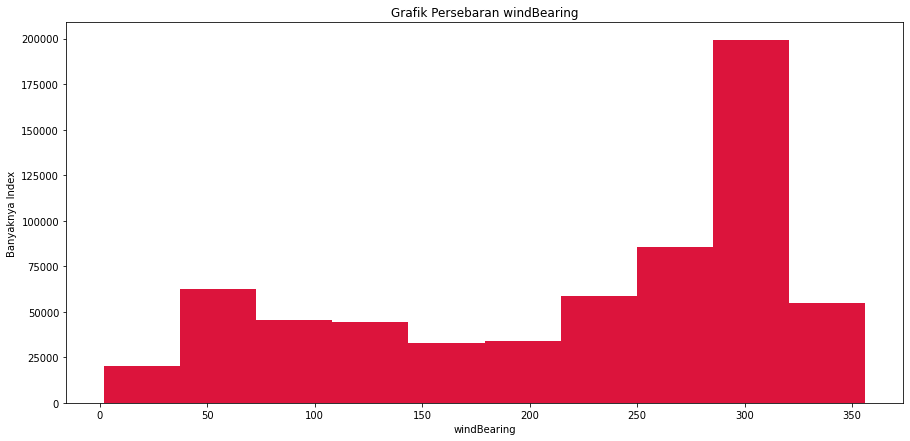

In [36]:
histo(df['windBearing'], judul="Grafik Persebaran windBearing" , labelx='windBearing')

Tahap berikutnya adalah melakukan split data. Menurut dugaan saya, data akan bagus jika X distandarisasi. Akan tetapi, saya cukup ragu sehingga langkah berikutnya adalah melakukan split data dengan 2 X yaitu X yang belum distandarisasi dan X yang telah distandarisasi.

## X tanpa Standarisasi

Berikutnya X dan y akan dibagi menjadi X_train, X_test, y_train, dan y_test. Untuk random state yang dipakai adalah 69 dan train size yang digunakan adalah 69%

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.69 ,random_state=69)

print('Data X Train')
display(X_train.head(3))

print('Data X Test')
display(X_test.head(3))

print('Data y Train')
display(y_train.head(3))

print('Data y Test')
display(y_test.head(3))

Data X Train


,distance,surge_multiplier,cab_type,visibility,windBearing,moonPhase,windGust
370893,1.30,1.0,1,10.000,310,0.75,5.28
455298,3.04,1.0,0,9.908,290,0.72,9.33
378746,1.05,1.0,0,9.917,349,0.21,3.48


Data X Test


,distance,surge_multiplier,cab_type,visibility,windBearing,moonPhase,windGust
457800,1.78,1.0,1,2.069,250,0.89,4.54
5870,2.32,1.0,1,4.767,224,0.89,5.27
555323,0.92,1.0,1,3.139,356,0.33,10.88


Data y Train


370893     7.5
455298     9.0
378746    13.5
Name: price, dtype: float64

Data y Test


457800     8.5
5870      30.5
555323    27.5
Name: price, dtype: float64

## X dengan Standarisasi

Data X akan dilakukan normalisasi supaya memperbagus hasil regresi linear

In [38]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(data=X_norm, columns=['distance', 'surge_multiplier', 'cab_type','visibility', 'windBearing', 'moonPhase', 'windGust'])
X_norm

,distance,surge_multiplier,cab_type,visibility,windBearing,moonPhase,windGust
0,-1.540640,-0.157905,-1.036986,0.588364,-1.646155,-1.140607,0.132242
1,-1.540640,-0.157905,-1.036986,-1.415614,-1.313115,0.249000,0.663565
2,-1.540640,-0.157905,-1.036986,0.588364,0.200705,0.412483,-0.215671
3,-1.540640,-0.157905,-1.036986,0.588364,0.907154,0.698578,-0.603292
4,-1.540640,-0.157905,-1.036986,0.588364,0.836509,0.575966,0.126569
...,...,...,...,...,...,...,...
637971,-1.047427,-0.157905,0.964333,0.505729,-0.879153,0.984674,-1.058982
637972,-1.047427,-0.157905,0.964333,0.505729,-0.879153,0.984674,-1.058982
637973,-1.047427,-0.157905,0.964333,0.505729,-0.879153,0.984674,-1.058982
637974,-1.047427,-0.157905,0.964333,0.505729,-0.879153,0.984674,-1.058982


In [39]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, train_size=0.69 ,random_state=69)

print('Data X Train')
display(X_train_norm.head(3))

print('Data X Test')
display(X_test_norm.head(3))

print('Data y Train')
display(y_train.head(3))

print('Data y Test')
display(y_test.head(3))

Data X Train


,distance,surge_multiplier,cab_type,visibility,windBearing,moonPhase,windGust
341516,-0.783206,-0.157905,0.964333,0.588364,0.907154,0.698578,-0.603292
419258,0.749278,-0.157905,-1.036986,0.553004,0.705312,0.575966,0.162495
348766,-1.003390,-0.157905,-1.036986,0.556463,1.300748,-1.508444,-0.943641


Data X Test


,distance,surge_multiplier,cab_type,visibility,windBearing,moonPhase,windGust
421554,-0.360452,-0.157905,0.964333,-2.459880,0.301627,1.270769,-0.743213
5423,0.115147,-0.157905,0.964333,-1.422916,0.039231,1.270769,-0.605183
511251,-1.117886,-0.157905,0.964333,-2.048631,1.371392,-1.017995,0.455574


Data y Train


370893     7.5
455298     9.0
378746    13.5
Name: price, dtype: float64

Data y Test


457800     8.5
5870      30.5
555323    27.5
Name: price, dtype: float64

# Pendefinisian Model

Alasan menggunakan model regresi linear karena tujuan akhir dari projek ini. 
Tujuan projek ini yaitu memprediksi berapa harga dari lyft atau uber jika kita memasukkan jarak, surge multplier, cab, windgust, windbearing, moonphase, dan visibility.
Regresi linear merupakan algoritma machine learning yang sangat cocok untuk data yang tipikalnya continu.

# Pelatihan Model

Model pertama dibuat dengan X tanpa standarisasi

In [40]:
model = LinearRegression().fit(X_train, y_train)

In [41]:
y_predict = model.predict(X_test)

Model kedua X dibuat dengan standarisasi

In [42]:
model2 = LinearRegression().fit(X_train_norm, y_train)

In [43]:
y_predict2 = model.predict(X_test_norm)

Kita akan mencoba menggunakannya dengan data baru yang telah kami siapkan

# Evaluasi Model

Lakukan perbandingan data agar bisa mengetahui hasil prediksi yang lebih bagus

In [44]:
y_dataframe = pd.DataFrame({
    'y_test':y_test, 
    'y_predict':y_predict, 
    'y_predict2':y_predict2,
    'yt - yp1':abs(y_test-y_predict),
    'yt - yp2':abs(y_test-y_predict2),
    'yp1 > yp2': abs(y_test-y_predict) > abs(y_test-y_predict2),
})
display(y_dataframe.head(3))
print('Ada berapa selisih ytest dengan y_predict lebih besar daripada ytest dengan y_predict2 ?')
yp1_less = y_dataframe[y_dataframe['yp1 > yp2'] == False]['yp1 > yp2'].count()
display(yp1_less)
print('Ada berapa selisih ytest dengan y_predict lebih kecil daripada ytest dengan y_predict2 ?')
yp1_more = y_dataframe[y_dataframe['yp1 > yp2'] == True]['yp1 > yp2'].count()

display(yp1_more)

,y_test,y_predict,y_predict2,yt - yp1,yt - yp2,yp1 > yp2
457800,8.5,14.621149,-16.942778,6.121149,25.442778,False
5870,30.5,16.146806,-15.607950,14.353194,46.107950,False
555323,27.5,12.191671,-19.128449,15.308329,46.628449,False


Ada berapa selisih ytest dengan y_predict lebih besar daripada ytest dengan y_predict2 ?


196403

Ada berapa selisih ytest dengan y_predict lebih kecil daripada ytest dengan y_predict2 ?


1370

Tampilan perbandingan dalam bentuk grafik

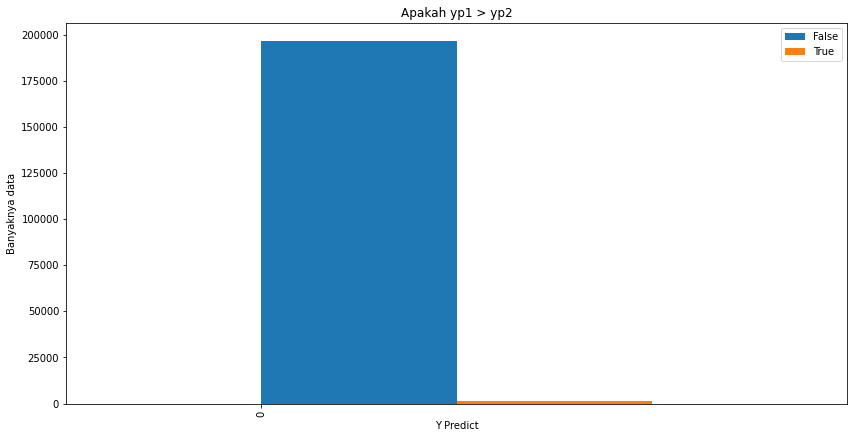

In [45]:
data_01 = np.array([yp1_less, yp1_more])
predict_less_more = pd.DataFrame(data=data_01, columns=['False'])
predict_less_more['True'] = yp1_more
predict_less_more.drop(index=1, inplace=True)
predict_less_more

predict_less_more.plot(kind='bar', align='edge', figsize=(14,7))
plt.title('Apakah yp1 > yp2')
plt.ylabel('Banyaknya data')
plt.xlabel('Y Predict')
plt.show()

Berdasarkan data tersebut, dapat diketahui kalau tanpa adanya standarisasi, data tersebut lebih bagus daripada menggunakan standarisasi. Hal ini terjadi karena pada versi sebelum standarisasi, data X-nya masih murni sehingga koefisien dari linear regresinya akan lebih akurat untuk memprediksi hasil y yaitu price.

In [46]:
df_withna['cab_type'] = le.fit_transform(df_withna.cab_type)
ypredpred = model.predict(df_withna[['distance', 'surge_multiplier', 'cab_type', 'visibility', 'windBearing', 'moonPhase', 'windGust']])
ypredpred

array([13.62965946, 17.46729791, 18.77597081, ..., 15.54871209,
       15.06334508, 13.35393598])

Melakukan ekspor model

In [47]:
import pickle
pickle.dump(model, open('linear_regression.pkl','wb'))

# Penarikan Kesimpulan

Beberapa informasi yang bisa didapatkan dari percobaan ini yaitu :
1. Banyaknya data adalah 693071 dan banyaknya kolom adalah 57. Akan tetapi, banyaknya data yang terpakai adalah 637976 dan banyaknya kolom yang terpakai adalah distance,surge_multiplier, price, cab_type, windgust, windbearing, visibility, dan moonphase
2. Data yang digunakan tidak terlalu bersih sehingga perlu dilakukan penanganan terhadap data yang hilang.
3. Nilai kolom cab_type diubah, tetapi tidak digunakan
4. Banyaknya kolom pada suatu data tidak harus dijadikan sebagai bagian dari linear regresi. Sebagai contoh, banyaknya berbagai kolom tentang temperature dicantumkan di dataset, tetapi tidak ada yang digunakan karena nilai korelasinya hampir mendekati 0 pada price. Pada pengukuran ini, kolom yang dipakai adalah kolom yang nilai korelasinya 0.001 pada price
5. Melakukan pemilihan kolom yang dipakai sangat berguna untuk meringankan kinerja komputasi data.
6. Pemilihan kolom tidak bisa dilakukan secara sembarang, harus ada alasan atau bukti yang melandasi. Dalam percobaan ini, bukti yang melandasi adalah type dari data dan nilai korelasi kepada price.
7. Pada percobaan kali ini, menggunakan dua jenis X yaitu X tanpa standarisasi dan X dengan standarisasi.
8. Kedua X itu membuat y predict dan hasilnya X tanpa standarisasi yang hampir mendekati y test.

Kesimpulan dalam percobaan ini yaitu :
1. Tidak selamanya data X hasil standarisasi akan lebih baik daripada X tanpa standarisasi dalam kasus linear regresi. Oleh karena itu, harus ada perbandingan terlebih dahulu.
2. Kolom dari dataset yang dipakai untuk percobaan ini adalah distance,surge_multiplier, price, cab_type, windgust, windbearing, visibility, dan moonphase. Alasannya memakai data tersebut adalah nilai korelasinya di atas 0.001 terhadap price.